# Load

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
with open('logins.json', 'r') as json_file:
    json_data = json.load(json_file) # in type dict

logins = pd.DataFrame(json_data)
logins.head()

login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21

In [3]:
with open('ultimate_data_challenge.json', 'r') as json_file:
    json_data = json.load(json_file) # in type dict

df = pd.DataFrame(json_data)
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

# Exploratory data analysis

In [4]:
logins.login_time = pd.to_datetime(logins.login_time)

In [5]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
logins['count'] = 1

In [7]:
logins.set_index('login_time', inplace=True)

In [8]:
logins_15 = logins.resample('15T').sum()
logins_15.head()

count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1

Text(0, 0.5, 'count')

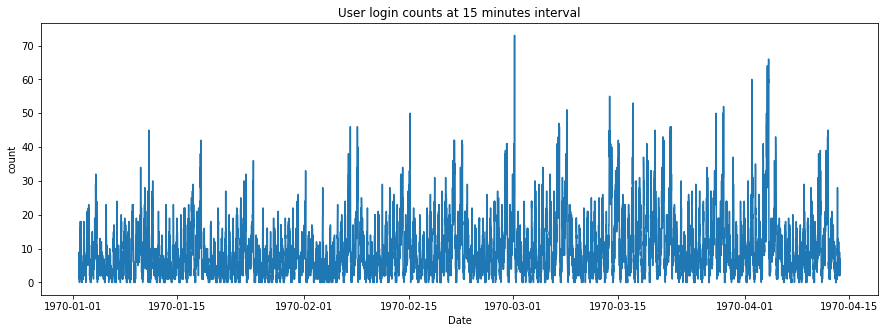

In [9]:
plt.figure(figsize=(15,5))
plt.plot(logins_15.index.values, logins_15['count'])
plt.title('User login counts at 15 minutes interval')
plt.xlabel('Date')
plt.ylabel('count')

In [10]:
logins_15[logins_15['count']==logins_15['count'].max()]

count
login_time                
1970-03-01 04:30:00     73

It looks like that user logins reached the maximum at 1970-03-01 04:30. There are 73 user logins. 

In [11]:
#Is the login counts a Random Walk?
from statsmodels.tsa.stattools import adfuller
results = adfuller(logins_15['count'])
print(results)

(-10.337954309060418, 2.732396654223457e-18, 38, 9749, {'1%': -3.431020942932955, '5%': -2.8618365160244372, '10%': -2.5669278303551253}, 56368.34584451129)


The P value = 2.73e-18 is less than 5%, we can reject the null hypothesis that the series is a random walk.

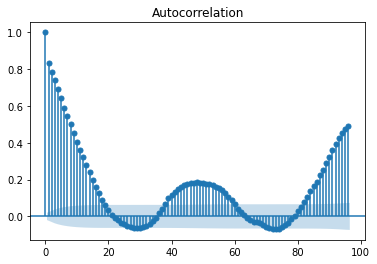

In [12]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
# Plot the autocorrelation function of the series
plot_acf(logins_15, lags=96, alpha=0.05)
plt.show()

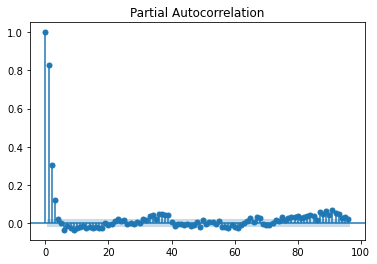

In [13]:
# Plot the partial autocorrelation function of the series
plot_pacf(logins_15, lags=96, alpha=0.05)
plt.show()

In [14]:
#daily difference
dailyd = logins_15.diff(96)
print(dailyd.head(97))

                     count
login_time                
1970-01-01 20:00:00    NaN
1970-01-01 20:15:00    NaN
1970-01-01 20:30:00    NaN
1970-01-01 20:45:00    NaN
1970-01-01 21:00:00    NaN
...                    ...
1970-01-02 19:00:00    NaN
1970-01-02 19:15:00    NaN
1970-01-02 19:30:00    NaN
1970-01-02 19:45:00    NaN
1970-01-02 20:00:00    5.0

[97 rows x 1 columns]


In [15]:
#drop the NaN data in the first 96 rows
dailyd = dailyd.dropna()

In [16]:
#Is the daily difference a Random Walk?
results = adfuller(dailyd)
print(results)

(-11.003366795842009, 6.596597267622316e-20, 38, 9653, {'1%': -3.431027617299671, '5%': -2.861839465352722, '10%': -2.5669294002898186}, 60877.28379179101)


The P value = 6.6e-20 is less than 5%, we can reject the null hypothesis that the series is a random walk.

Text(0, 0.5, 'count difference')

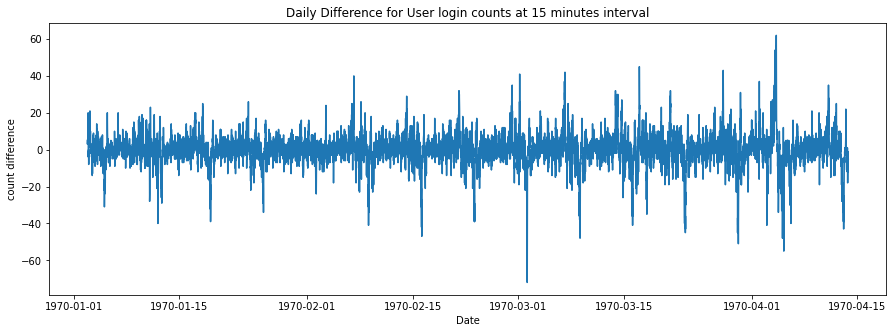

In [17]:
plt.figure(figsize=(15,5))
plt.plot(dailyd)
plt.title('Daily Difference for User login counts at 15 minutes interval')
plt.xlabel('Date')
plt.ylabel('count difference')

(13.833333333333334, 14.833333333333334)

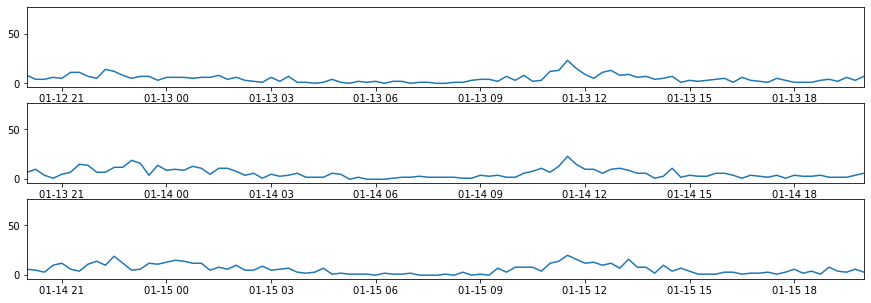

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,5))
ax1.plot(logins_15)
ax1.set_xlim([pd.to_datetime('1970-01-12 20:00:00'), pd.to_datetime('1970-01-13 20:00:00')])
ax2.plot(logins_15)
ax2.set_xlim([pd.to_datetime('1970-01-13 20:00:00'), pd.to_datetime('1970-01-14 20:00:00')])
ax3.plot(logins_15)
ax3.set_xlim([pd.to_datetime('1970-01-14 20:00:00'), pd.to_datetime('1970-01-15 20:00:00')])

(61.833333333333336, 62.833333333333336)

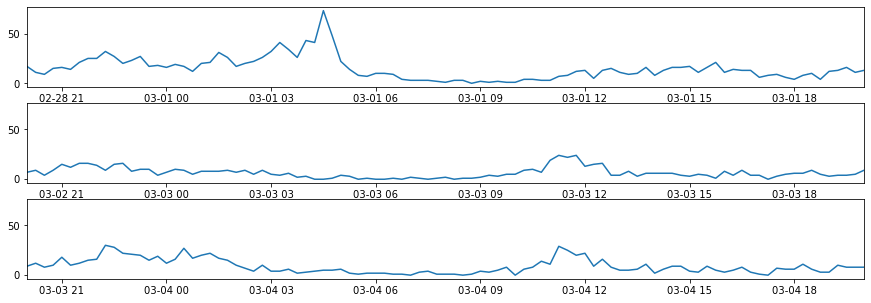

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,5))
ax1.plot(logins_15)
ax1.set_xlim([pd.to_datetime('1970-02-28 20:00:00'), pd.to_datetime('1970-03-01 20:00:00')])
ax2.plot(logins_15)
ax2.set_xlim([pd.to_datetime('1970-03-02 20:00:00'), pd.to_datetime('1970-03-03 20:00:00')])
ax3.plot(logins_15)
ax3.set_xlim([pd.to_datetime('1970-03-03 20:00:00'), pd.to_datetime('1970-03-04 20:00:00')])

(100.83333333333333, 101.83333333333333)

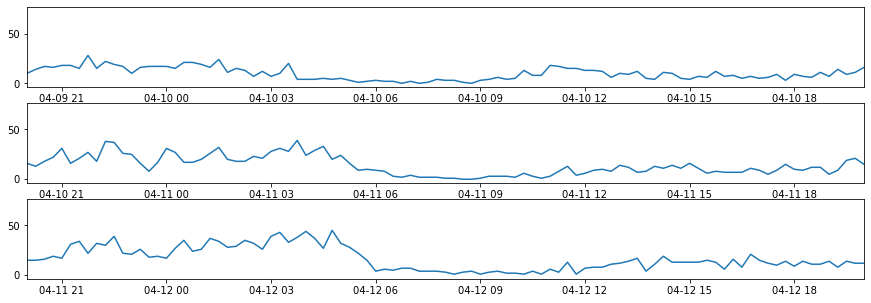

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,5))
ax1.plot(logins_15)
ax1.set_xlim([pd.to_datetime('1970-04-09 20:00:00'), pd.to_datetime('1970-04-10 20:00:00')])
ax2.plot(logins_15)
ax2.set_xlim([pd.to_datetime('1970-04-10 20:00:00'), pd.to_datetime('1970-04-11 20:00:00')])
ax3.plot(logins_15)
ax3.set_xlim([pd.to_datetime('1970-04-11 20:00:00'), pd.to_datetime('1970-04-12 20:00:00')])

By looking at the daily plots for a few days from each month, we can see that users were less active during 6am to 9am each day. The demand is generally higher at night from 21:00 to 03:00 and in the morning from 11:00 to 13:00. However the pattern is not consistant such that the highest count of user logins happen at 04:30.

(88.83333333333333, 95.83333333333333)

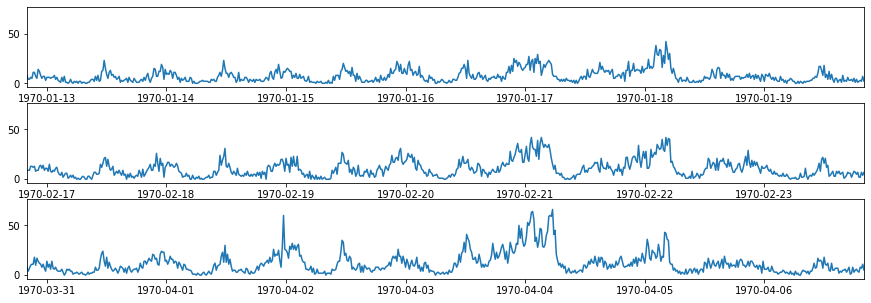

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,5))
ax1.plot(logins_15)
ax1.set_xlim([pd.to_datetime('1970-01-12 20:00:00'), pd.to_datetime('1970-01-19 20:00:00')])
ax2.plot(logins_15)
ax2.set_xlim([pd.to_datetime('1970-02-16 20:00:00'), pd.to_datetime('1970-02-23 20:00:00')])
ax3.plot(logins_15)
ax3.set_xlim([pd.to_datetime('1970-03-30 20:00:00'), pd.to_datetime('1970-04-06 20:00:00')])

Looking at the weekly plots, weekends tend to have much higher demand over weekdays.

So in conclusion, demand is typical higher at night, at noon and at weekend. 

# Part 2 - Experiment and metrics design

1. Q: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

    A: I would choose the number of times the drivers pass the toll bridge. If the policy successfully encourage the drivers to serve for both cities, the number of trips across the bridge will increase. 

2. Q: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    <br/>a. how you will implement the experiment
    <br/>b. what statistical test(s) you will conduct to verify the significance of the observation
    <br/>c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

    A: I will do a hypothesis test to determine whether the experiment encourages driver partners to serve both cities. First I need a null hypothesis, which is "The number of times the drivers pass the toll bridge is the same before and after implementing the promoting policy". The alternate hypothesis will be "The number of times the drivers pass the toll bridge increases after implementing the promoting policy". The significant level, which represents the probablity we are willing to place for making an incorrect decision in regards to rejecting the null hypothesis. Here we can choose the common value, 0.05 or 5%. After computing the test statistic, we then compare it with the sample statistic. A p-value is found by using the test statistic to calculate the probablity of the sample data producing such a test statistic or one more extreme. If the p-vaule is less than 0.05, then there is a statistically significant difference between the number of times the drivers pass the toll bridge before and after the experiment. We reject the null hypothesis. Therefore, the experiment in encouraging driver partners is successful. On the opposite side, the experiment can be concluded as unsuccessful. 

# Part 3 - Predictive modeling

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The "last_trip_date" column is not a datetime object. In order to know whether the user booked a trip within the preceding 30 days, we need to know when is there last trip first.

In [23]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format='%Y-%m-%d')

In [24]:
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%Y-%m-%d')

In [25]:
least_recent_date = df['signup_date'].min()
most_recent_date = df['signup_date'].max()
print('The earlist signup date is {}'.format(least_recent_date))
print('The most recent signup date is {}'.format(most_recent_date))

The earlist signup date is 2014-01-01 00:00:00
The most recent signup date is 2014-01-31 00:00:00


In [26]:
least_recent_date = df['last_trip_date'].min()
most_recent_date = df['last_trip_date'].max()
print('The earlist trip happened on {}'.format(least_recent_date))
print('The most recent trip happened on {}'.format(most_recent_date))

The earlist trip happened on 2014-01-01 00:00:00
The most recent trip happened on 2014-07-01 00:00:00


Assuming that the date for data pulling is on July 1st, it will be June 1st if we trace back 30 days. We will consider an user to be "retained" if they booked a trip after June 1st. 

In [27]:
#Add a boolean column to the dataframe to show if user were active in the preceding 30 days.
df['if_active'] = 0
df['if_active'][df['last_trip_date'] > datetime(2014, 6, 1)] = 1

<ipython-input-27-4f6f83d4beb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['if_active'][df['last_trip_date'] > datetime(2014, 6, 1)] = 1


In [28]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  if_active  
0         46.2      3.67                   5.0          1  
1         50.0      8.26                   5.0          0  
2        100.0      0.77                   5.0          0  
3         80.0      2.36                   4.9          1  
4         82.4      3.13                   4.9          0

<AxesSubplot:xlabel='if_active', ylabel='count'>

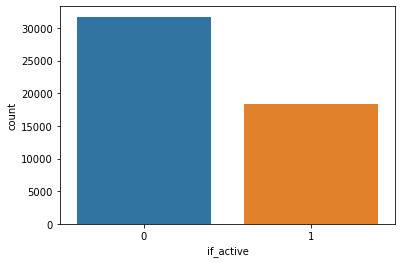

In [29]:
sns.countplot(x ='if_active', data = df)

In [30]:
(df['if_active']==1).sum()

18310

In [31]:
(df['if_active']==0).sum()

31690

In [32]:
#ratio for active over inactive users
(df['if_active']==1).sum()/(df['if_active']==0).sum()*100

57.778479015462295

There are more than 18k users booked trip in preceding 30 days. This number is about 58% of the users who didn't have any actions in the preceding 30 days.

In [33]:
#ratio for active over total users
(df['if_active']==1).sum()/len(df['if_active'])*100

36.620000000000005

There are 36.62% of users are active.

## Data Cleaning & Exploratory Analysis

There are a few columns that contain empty data. Let's see how many do we have and whether they should be replaced by average value or just drop them for modeling.

<AxesSubplot:xlabel='avg_rating_of_driver', ylabel='Count'>

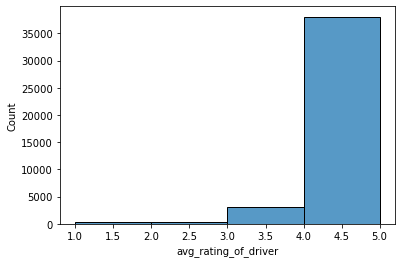

In [34]:
sns.histplot(x='avg_rating_of_driver',data = df, bins=4)

In [35]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [36]:
df['avg_rating_of_driver'].isnull().sum()/len(df['avg_rating_of_driver'])*100

16.244

As we can see above, there are more than 16% of data does not have average rating of driver. It might because the customer didn't rate the driver. Let us look at these data.

In [37]:
df[df['avg_rating_of_driver'].isnull()]

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
6         Astapor                       1  2014-01-24                   NaN   
9      Winterfell                       1  2014-01-03                   NaN   
12     Winterfell                       1  2014-01-15                   NaN   
14        Astapor                       1  2014-01-27                   NaN   
15     Winterfell                       1  2014-01-15                   NaN   
...           ...                     ...         ...                   ...   
49984  Winterfell                       1  2014-01-26                   NaN   
49985     Astapor                       1  2014-01-26                   NaN   
49989  Winterfell                       1  2014-01-24                   NaN   
49996     Astapor                       1  2014-01-24                   NaN   
49999     Astapor                       0  2014-01-18                   NaN   

       avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
6            1.0     2014-01-25  Android        0.0                False   
9            1.0     2014-01-05  Android        0.0                False   
12           1.0     2014-03-12   iPhone        0.0                False   
14           1.0     2014-01-28  Android        0.0                False   
15           1.0     2014-01-16  Android        0.0                 True   
...          ...            ...      ...        ...                  ...   
49984        1.0     2014-01-26  Android        0.0                False   
49985        1.0     2014-02-25  Android        0.0                False   
49989        1.0     2014-01-31   iPhone        0.0                False   
49996        1.0     2014-01-25   iPhone        0.0                False   
49999        1.0     2014-04-20  Android        0.0                False   

       weekday_pct  avg_dist  avg_rating_by_driver  if_active  
6            100.0      3.95                   4.0          0  
9              0.0      2.37                   5.0          0  
12           100.0     20.29                   5.0          0  
14           100.0     26.01                   5.0          0  
15           100.0     13.20                   5.0          0  
...            ...       ...                   ...        ...  
49984          0.0      3.50                   5.0          0  
49985        100.0      1.38                   5.0          0  
49989        100.0      0.00                   5.0          0  
49996          0.0      0.00                   4.0          0  
49999          0.0      3.49                   5.0          0  

[8122 rows x 13 columns]

<AxesSubplot:xlabel='if_active', ylabel='count'>

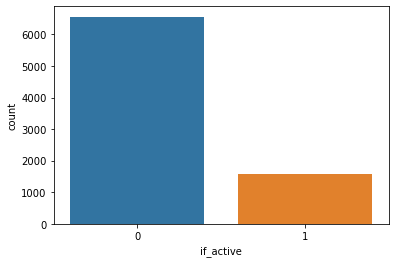

In [38]:
sns.countplot(x ='if_active', data = df[df['avg_rating_of_driver'].isnull()])

It is interesting that most of these people who didn't rate their driver are not active user in the preceding 30 days. So it might be an important factor for prediction. Instead of dropping them or assign average values to them, I will assign 0 rating to represent missing rating.

In [39]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(0)

In [40]:
df['avg_rating_of_driver'].isnull().sum()

0

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='Count'>

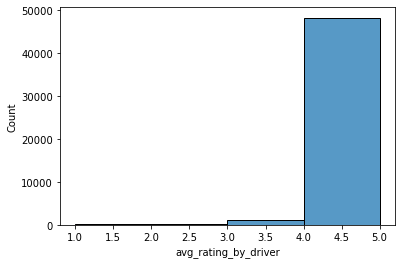

In [41]:
sns.histplot(x='avg_rating_by_driver',data = df, bins=4)

In [42]:
df['avg_rating_by_driver'].isnull().sum()/len(df['avg_rating_by_driver'])*100

0.402

<AxesSubplot:xlabel='if_active', ylabel='count'>

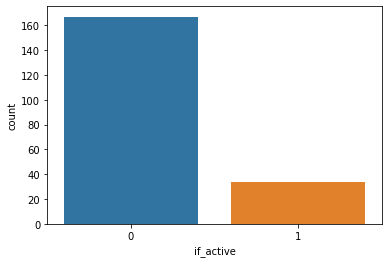

In [43]:
sns.countplot(x ='if_active', data = df[df['avg_rating_by_driver'].isnull()])

There are very little data missing for the average rating by driver. Although it also tends be related to the user behavior, I will drop it for now.

In [44]:
df = df[~df['avg_rating_by_driver'].isnull()]

There are some missing data left on the phone device. Let me drop them as well.

In [45]:
df = df[~df['phone'].isnull()]

In [46]:
df = df.drop_duplicates()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49398 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49398 non-null  object        
 1   trips_in_first_30_days  49398 non-null  int64         
 2   signup_date             49398 non-null  datetime64[ns]
 3   avg_rating_of_driver    49398 non-null  float64       
 4   avg_surge               49398 non-null  float64       
 5   last_trip_date          49398 non-null  datetime64[ns]
 6   phone                   49398 non-null  object        
 7   surge_pct               49398 non-null  float64       
 8   ultimate_black_user     49398 non-null  bool          
 9   weekday_pct             49398 non-null  float64       
 10  avg_dist                49398 non-null  float64       
 11  avg_rating_by_driver    49398 non-null  float64       
 12  if_active               49398 non-null  int64 

Now we are done with data cleaning. Let's do some EDA for the cleaned data.

In [48]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

<AxesSubplot:xlabel='city', ylabel='count'>

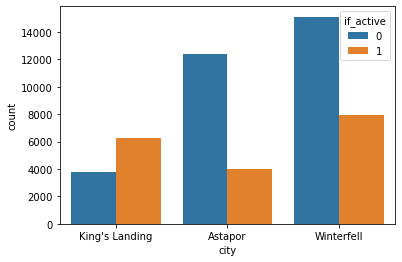

In [49]:
sns.countplot(x='city', data=df, hue='if_active')

Most of the users locate at Winterfell. Astapor and Winterfell both have more inactive users than active users. In the opposite, King's Landing has more active users than inactive users. 

<AxesSubplot:xlabel='phone', ylabel='count'>

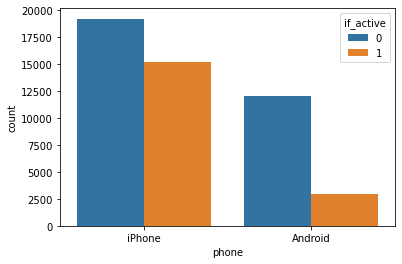

In [50]:
sns.countplot(x='phone', data=df, hue='if_active')

There are more users using iphone than android phone. The active rate for iphone is also much higher than android. It is worth to take a look at why there is such a big difference.

<AxesSubplot:xlabel='ultimate_black_user', ylabel='count'>

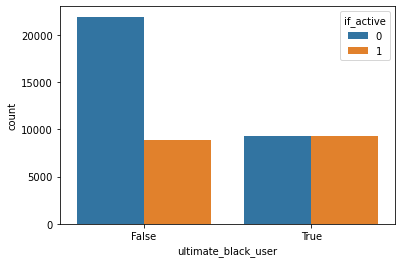

In [51]:
sns.countplot(x='ultimate_black_user', data=df, hue='if_active')

It was obvious that people who enroll in the ultimate black user program in their first 30 days are more likely to retained.

(0.0, 140.0)

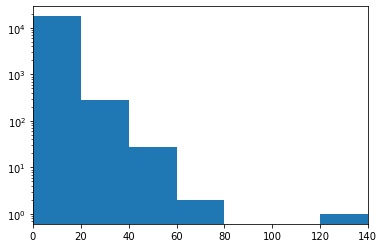

In [52]:
bins_list = [0, 20, 40, 60, 80, 100, 120, 140]
plt.hist(df[df['if_active']==1]['trips_in_first_30_days'], bins=bins_list, log=True)
plt.xlim(0,140)

(0.0, 140.0)

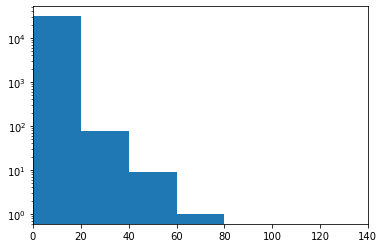

In [53]:
plt.hist(df[df['if_active']==0]['trips_in_first_30_days'], bins=bins_list, log=True)
plt.xlim(0,140)

<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='Count'>

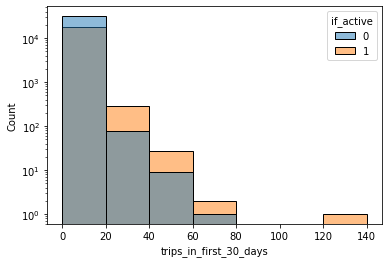

In [54]:
sns.histplot(x='trips_in_first_30_days', data=df, bins=bins_list, hue='if_active', log_scale=(False,True))

For users who had more trips in the first 30 days, they are more likely to be active than inactive. The more trips they had, bigger chance to stay.

<AxesSubplot:xlabel='avg_rating_of_driver', ylabel='Count'>

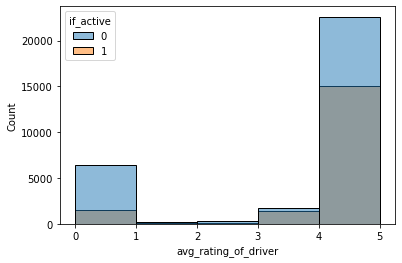

In [55]:
sns.histplot(x='avg_rating_of_driver', data=df, bins=5, hue='if_active')

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='Count'>

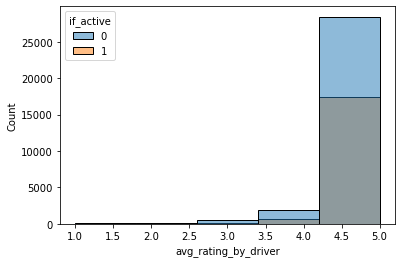

In [56]:
sns.histplot(x='avg_rating_by_driver', data=df, bins=5, hue='if_active')

While most of the ratings fall between 4 and 5, there are more low rating that customers gave out. For those people who gave low ratings to drivers are more likely to give up using the platform. For those riders who receive lower ratings are also more likely to be inactive.

<AxesSubplot:xlabel='surge_pct', ylabel='Count'>

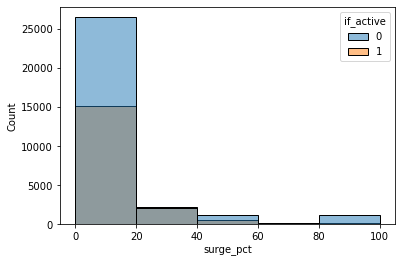

In [57]:
sns.histplot(x='surge_pct', data=df, bins=5, hue='if_active')

In [58]:
df['surge_pct'].describe()

count    49398.000000
mean         8.848221
std         19.891457
min          0.000000
25%          0.000000
50%          0.000000
75%          8.700000
max        100.000000
Name: surge_pct, dtype: float64

<AxesSubplot:xlabel='avg_surge', ylabel='Count'>

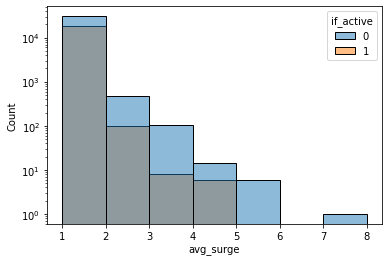

In [59]:
sns.histplot(x='avg_surge', data=df, bins=7, hue='if_active', log_scale=(False, True))

In [60]:
df['avg_surge'].describe()

count    49398.000000
mean         1.074629
std          0.221025
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

Most of the users do not have any trip with surge multiplier greater than 1. Most of users have average surge multiplier over all of each user's trips equals to 1 as well. However we do see a higher surge may lead to losing users. It makes sense because higher price is always intimadating.

<AxesSubplot:xlabel='weekday_pct', ylabel='Count'>

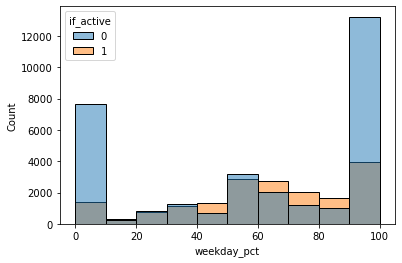

In [61]:
sns.histplot(x='weekday_pct', data=df, bins=10, hue='if_active')

In [62]:
df['weekday_pct'].describe()

count    49398.000000
mean        60.917074
std         37.019839
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

Most of people either only active at weekday or only active at weekend. And most of people who only active on weekday or weekend are more likely to be inactive. For the rest of people who are active both weekday and weekend, they tend to bee more likely to retained of they have higher weekday percentage.

<AxesSubplot:xlabel='avg_dist', ylabel='Count'>

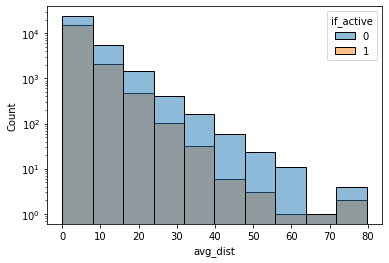

In [63]:
sns.histplot(x='avg_dist', data=df, bins=10, hue='if_active', log_scale=(False, True))

Most of users has short distance. We can see the inactive rate gets higher when the distance gets longer. Maybe the fare for longer distance is not as attractive as the one for shorter distance. 

## Modeling 

Now we get some ideas about the relationship between each features and the rate of retention. Let perform some modeling.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [65]:
df_dummy = pd.get_dummies(df)

In [66]:
df_dummy['ultimate_black_user'] = df_dummy['ultimate_black_user'].astype('int')

In [67]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49398 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49398 non-null  int64         
 1   signup_date             49398 non-null  datetime64[ns]
 2   avg_rating_of_driver    49398 non-null  float64       
 3   avg_surge               49398 non-null  float64       
 4   last_trip_date          49398 non-null  datetime64[ns]
 5   surge_pct               49398 non-null  float64       
 6   ultimate_black_user     49398 non-null  int64         
 7   weekday_pct             49398 non-null  float64       
 8   avg_dist                49398 non-null  float64       
 9   avg_rating_by_driver    49398 non-null  float64       
 10  if_active               49398 non-null  int64         
 11  city_Astapor            49398 non-null  uint8         
 12  city_King's Landing     49398 non-null  uint8 

Not all data are useful for training the model. Let's exclude the unnecessary features.

In [68]:
df_model = df_dummy.drop(['signup_date', 'last_trip_date'],axis=1)

In [69]:
df_model.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                    1         46.2      3.67                   5.0   
1                    0         50.0      8.26                   5.0   
2                    0        100.0      0.77                   5.0   
3                    1         80.0      2.36                   4.9   
4                    0         82.4      3.13                   4.9   

   if_active  city_Astapor  city_King's Landing  city_Winterfell  \
0          1             0                    1                0   
1          0             1                    0                0   
2          0             1                    0                0   
3          1             0                    1                0   
4          0             0                    0                1   

   phone_Android  phone_iPhone  
0              0             1  
1              1             0  
2              0             1  
3              0             1  
4              1             0

In [70]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['if_active'], axis=1), df_model['if_active'] , 
                                                            test_size=0.3, random_state=42)
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.7278677462887989


/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# The estimated coefficients will all be around 1:
print(clf.coef_)

[[ 1.09953179e-01  1.19365344e-01 -1.59616051e-01  3.74593173e-03
   9.03940592e-01  3.69580773e-04 -3.39046702e-02 -2.54804663e-01
  -8.19067014e-01  9.28538870e-01 -2.54690161e-01 -6.55975990e-01
   5.10757686e-01]]


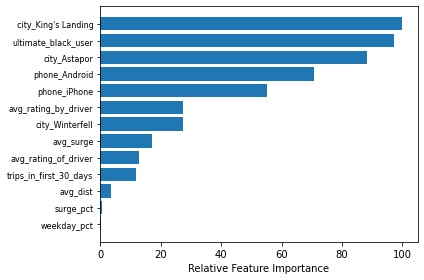

In [72]:
feature_importance = (clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [73]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
Xlr = scaler.transform(X_train)
Xtestlr = scaler.transform(X_test)

In [74]:
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.7278677462887989


/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0.        , 0.25284674, 1.        ]), array([0.        , 0.67754506, 1.        ]), array([2, 1, 0]))
0.7123491567178925


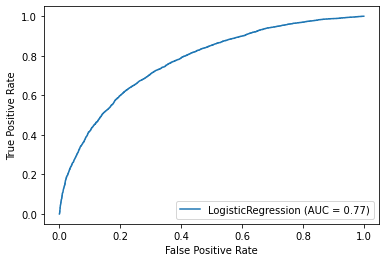

In [75]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

print(roc_curve(clf.predict(X_test), y_test))
print(roc_auc_score(clf.predict(X_test), y_test))
plot_roc_curve(clf, X_test, y_test)

In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, clf.predict(X_test))

array([[8005, 1324],
       [2709, 2782]])

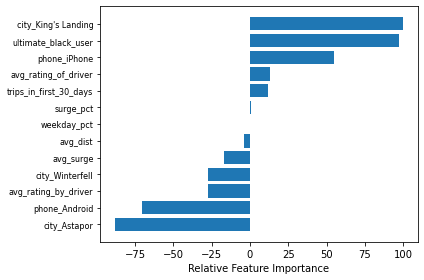

In [77]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

# Create first pipeline

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_rf_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   32.2s finished


In [79]:
print(accuracy_score(best_rf_clf.predict(X_test), y_test))

0.7640350877192983


(array([0.        , 0.19788645, 1.        ]), array([0.        , 0.69291796, 1.        ]), array([2, 1, 0]))
0.7475157541259354


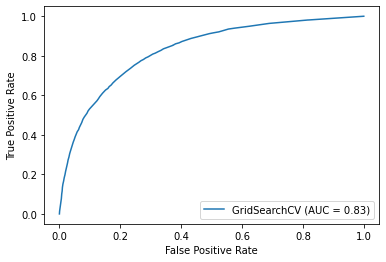

In [80]:
print(roc_curve(best_rf_clf.predict(X_test), y_test))
print(roc_auc_score(best_rf_clf.predict(X_test), y_test))
plot_roc_curve(best_rf_clf, X_test, y_test)

In [81]:
confusion_matrix(y_test, best_rf_clf.predict(X_test))

array([[7742, 1587],
       [1910, 3581]])

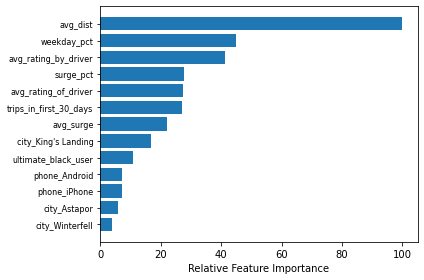

In [82]:
feature_importance = abs(clf.best_estimator_.named_steps['classifier'].feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Create second pipeline

pipe = Pipeline([('classifier' , KNeighborsClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [KNeighborsClassifier()],
    'classifier__n_neighbors' : list(range(5,10,1)),
    'classifier__weights': ("uniform", "distance")}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_KNN_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.3s finished


In [84]:
print(accuracy_score(best_KNN_clf.predict(X_test), y_test))

0.7549932523616734


(array([0.        , 0.21193124, 1.        ]), array([0.        , 0.68864097, 1.        ]), array([2, 1, 0]))
0.7383548649751732


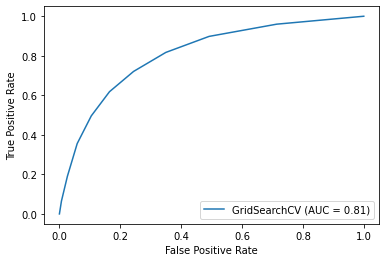

In [85]:
print(roc_curve(best_KNN_clf.predict(X_test), y_test))
print(roc_auc_score(best_KNN_clf.predict(X_test), y_test))
plot_roc_curve(best_KNN_clf, X_test, y_test)

In [86]:
confusion_matrix(y_test, best_KNN_clf.predict(X_test))

array([[7794, 1535],
       [2096, 3395]])

By far the best model is the random forest classifier model. Because is a boolean classifier problem, I used logistic classifier, random forest classifier and K-nearest neighbor classifier. The best model has 0.76 of accuracy and AUC of 0.74. If we look at the confusion matrix, about 66% of the active users were correctly predicted(True Negative). 
<br>The top three most important features are distance, weekday percentage and average rating by driver. These imply that in order to improve user experience on the platform, the company can focus on those 3 items. For example, company can give discount to longer trip users or set a weekday pass to whoever only use the platform on weekdays. For the user rating part, company can collect more detail comments from driver why they like or dislike the user and see how to improve the experience for both users and drivers.
<br>The accuracy still have room to improve. In the future, we can collect more data and perform feature engineering. There are model models and tuning process that could be done to improve the performance further more.